In [91]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
import copy

import seaborn as sns
sns.set(rc={'figure.figsize':(10, 7)})

----
#### Tạo dữ liệu cho bài toán K-means clusterings
Bước 1: sinh dữ liệu phân cụm ngẫu nhiên
- ở đây chúng tôi chọn số cụm n =3 ( thực hiện vòng for chạy với n = số cho trước, sau đó data sẽ random ra n giá trị, đây là cơ sở của số label trong bài toán)
- tạo một số list để add các phần tử vào
- tạo list để add số cụm, chạy thuật toán để tính mật độ phân tán của dữ liệu, tạo nên các vùng quanh dữ liệu
- thực hiện một số kiến thức về ma trận

In [149]:
N = 100 #số điểm dữ liệu mỗi cụm
u = 17 #mật độ phân tán
n = 3 #số cụm
X = []

cov = [[u, 0], [0, u]]
mean = []
for i in range(n):
  x_mean = np.random.randint(15, 75)
  y_mean = np.random.randint(15, 75)
  mean.append([x_mean, y_mean])
for i in mean:
  X.append(np.random.multivariate_normal(i, cov, N))
X = np.concatenate(X, axis = 0)
df = pd.DataFrame(X, columns=["x","y"])
df.T

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
x,70.998826,75.643173,67.763886,75.538087,75.643448,65.514030,74.430796,71.320805,70.685862,68.162263,...,35.496994,29.399079,34.841180,40.120048,31.468604,33.002701,39.724594,30.833641,34.208675,30.947569
y,14.128495,5.588197,11.865886,10.792212,14.976957,16.754014,8.918923,11.872520,12.247611,14.786719,...,38.980664,39.296735,46.432005,40.963057,45.502334,46.012560,44.519202,33.624341,45.183836,39.140988


In [130]:

df = pd.DataFrame({
    'x': np.random.randint(0,70, size=100),
    'y': np.random.randint(0,70, size=100)
    })
df.T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
x,38,42,50,42,15,20,40,30,0,67,...,29,22,67,56,49,40,22,65,24,22
y,62,16,67,48,47,62,49,14,13,44,...,49,61,27,22,6,55,49,16,8,26


# Phương pháp Elbow chọn số K 

+ chạy thử K-means và tính cost_function với các giá trị k

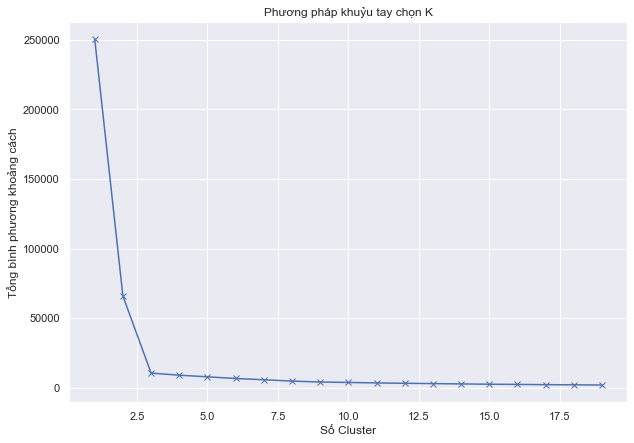

In [150]:
def elbow():
    K = range(1,20)
    Sum_of_squared_distances = []
    for i in K:
        km = KMeans(n_clusters=i)
        km = km.fit(df)
        Sum_of_squared_distances.append(km.inertia_)
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('Số Cluster')
    plt.ylabel('Tổng bình phương khoảng cách')
    plt.title('Phương pháp khuỷu tay chọn K')
    plt.show()
    return
elbow()

In [151]:
# Số cluster 
k = 3

In [152]:
colors = cm.rainbow(np.linspace(0, 1, k))
colors

array([[5.00000000e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [5.03921569e-01, 9.99981027e-01, 7.04925547e-01, 1.00000000e+00],
       [1.00000000e+00, 1.22464680e-16, 6.12323400e-17, 1.00000000e+00]])

- hàm chọn center và trực quan hóa center trên biểu đồ


In [153]:
# Chọn ngẫu nhiên K điểm center từ data
def create_center(k):
    r = []
    for i in range(k): r.append(np.random.randint(0, len(df))) # Chọn random 1 hàng ở trong df
    print(r)
    centroids = {
        i+1: [df['x'][r[i]], df['y'][r[i]]]  # gán các giá trị x,y của hàm được chọn làm center
        for i in range(k)
    }
    #print(centroids)
    return centroids

In [154]:
centroids = create_center(k)
centroids

[233, 52, 268]


{1: [33.054980369982815, 44.097931982336654],
 2: [63.70774490955841, 19.791609964223184],
 3: [29.539334922509354, 37.13224048840087]}

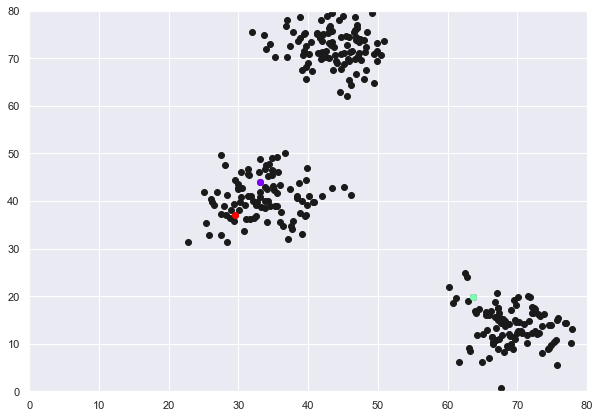

In [155]:
# Vẽ biểu đồ 
plt.scatter(df['x'], df['y'], color='k')
# Vẽ biểu đồ với 3 điểm center
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colors[i-1])

plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()
#ax.legend(fontsize='small')

- tính khoảng cách giữa các điểm center với từng điểm dữ liệu 

In [156]:
# Hàm tính khoảng cách từ mỗi điểm dữ liệu đến mỗi center
def assigment(df, centroids):
    for i in centroids.keys():
        #sqrt((x1-x2)^2 - (y1-y2)^2)
        df['distance_from_{}'.format(i)] = (   # Tạo các cột distance_from_ tương ứng để tính khoảng cách
            np.sqrt(                           # từ các điểm dữ liệu đến các center
                (df['x'] - centroids[i][0])**2 +
                (df['y'] - centroids[i][1])**2
            )  
        )     
    centroids_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroids_distance_cols].idxmin(axis=1) # Tìm cluter center gần nhất 
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_'))) # Bỏ đi các ký tự distance_from_
    df['color'] = df['closest'].map(lambda x: colors[x-1]) # Set màu tương tự center
    return df
    
df = assigment(df, centroids)
df

             x          y  distance_from_1  distance_from_2  distance_from_3  \
0    70.998826  14.128495        48.351862         9.232049        47.413729   
1    75.643173   5.588197        57.417365        18.552395        55.862246   
2    67.763886  11.865886        47.366792         8.903335        45.820356   
3    75.538087  10.792212        53.982268        14.864257        53.006436   
4    75.643448  14.976957        51.592720        12.870194        51.151205   
..         ...        ...              ...              ...              ...   
295  33.002701  46.012560         1.915342        40.377443         9.531788   
296  39.724594  44.519202         6.682904        34.447719        12.581999   
297  30.833641  33.624341        10.706562        35.665826         3.739062   
298  34.208675  45.183836         1.584361        38.922491         9.307574   
299  30.947569  39.140988         5.386323        38.047701         2.453200   

     closest                           

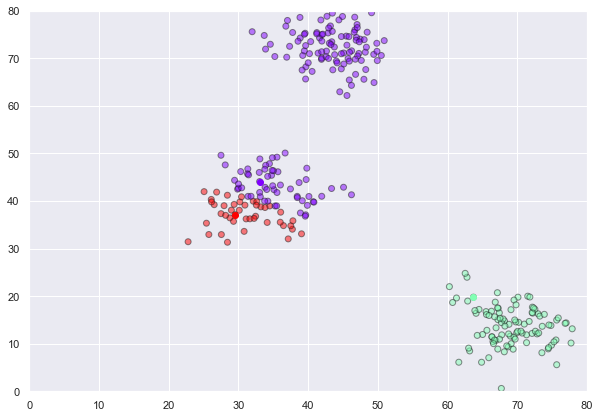

In [157]:
def plot_show():
    plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colors[i-1])
    plt.xlim(0, 80)
    plt.ylim(0, 80)
    plt.show()
plot_show()

In [158]:
old_centroids = copy.deepcopy(centroids)

# Update tọa độ mỗi center sau mỗi vòng lặp 
def update():
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return centroids
update()
print(centroids)

{1: [40.58325609019673, 61.885763944461374], 2: [69.1652097752025, 13.77612947099558], 3: [30.929732755040558, 37.081825192779924]}


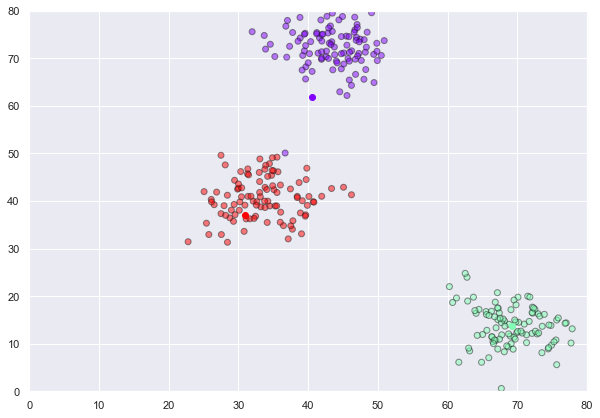

{1: [43.45927789640497, 72.20421044168238], 2: [69.1652097752025, 13.77612947099558], 3: [33.45618835445182, 40.58543604000056]}


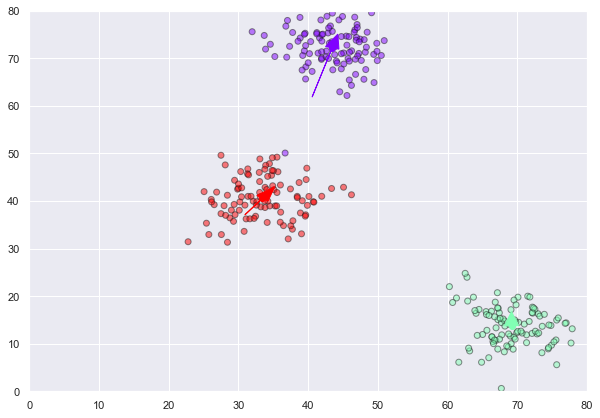

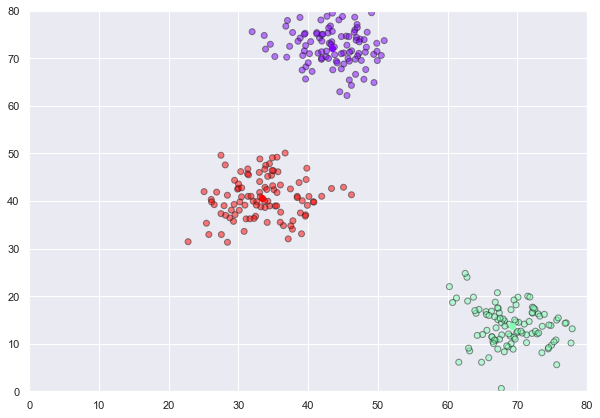

{1: [43.526760888186, 72.42531371514738], 2: [69.1652097752025, 13.77612947099558], 3: [33.48873625809031, 40.68052051055236]}


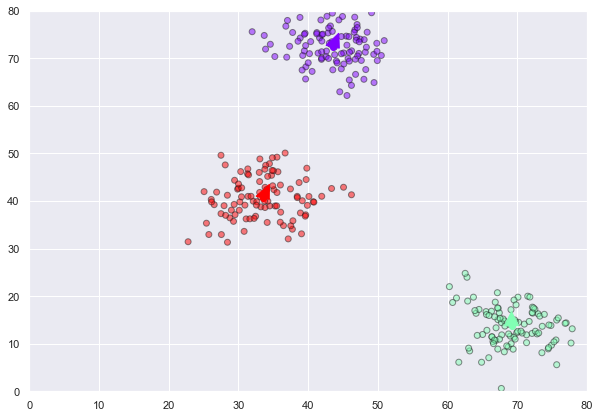

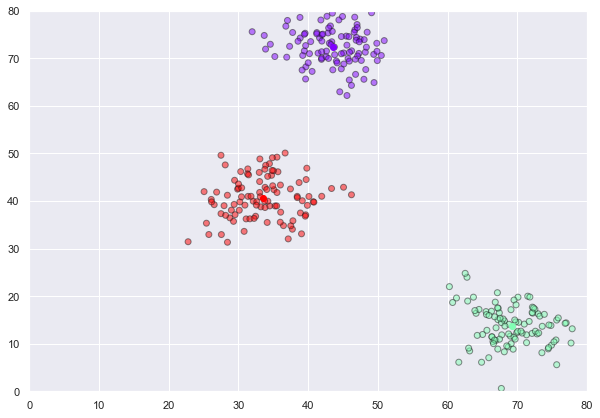

{1: [43.526760888186, 72.42531371514738], 2: [69.1652097752025, 13.77612947099558], 3: [33.48873625809031, 40.68052051055236]}


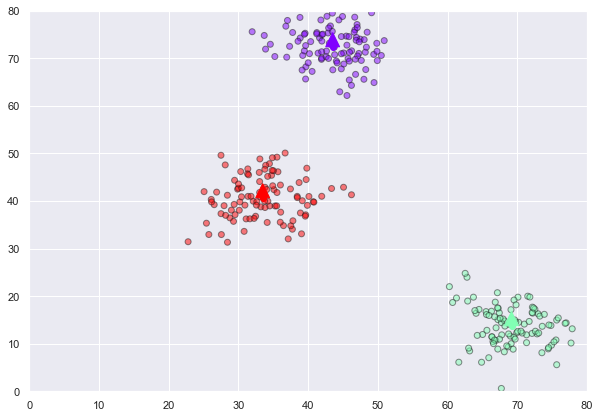

3

In [159]:
# Chạy K_means_clustering => điều kiện dừng khi tọa độ old_center = new_center
n = 0
while old_centroids != centroids:
    n = n +1
    df = assigment(df, centroids) # tính khoảng cách đến các điểm dữ liệu và label dữ liệu
    #print(df)
    old_centroids = copy.deepcopy(centroids) # gấn old_centroids là tập center cũ
    plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colors[i-1])
    plt.xlim(0, 80)
    plt.ylim(0, 80)
    plt.show()
    ax = plt.axes()
    update() # Cập nhập lại center mới
    #print(centroids)
    plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colors[i-1])
    plt.xlim(0, 80)
    plt.ylim(0, 80)
    for i in old_centroids.keys():
        old_x = old_centroids[i][0]
        old_y = old_centroids[i][1]
        dx = centroids[i][0] - old_centroids[i][0]
        dy = centroids[i][1] - old_centroids[i][1]  
        ax.arrow(old_x, old_y, dx, dy,head_width=2, head_length=3,  fc=colors[i-1], ec=colors[i-1])
    plt.show()
n 

In [160]:
def result():
    cost_function = { # Tổng khoảng các của các điểm dữ liệu thuộc 1 cluster đến center
    'Cluster' + str(i+1) : np.sum(df[df['closest'] ==i+1]['distance_from_{}'.format(i+1)])
    for i in range(k)
    }
    print(cost_function)
    x  = 0
    for i in cost_function: x = x + cost_function[i] # tộng toàn bộ sai số
    print('Cost_function for all data:',x)
    counts = df['closest'].value_counts()
    print(counts)
    return
result()

{'Cluster1': 502.3615161181598, 'Cluster2': 507.1234112605585, 'Cluster3': 573.5638663710295}
Cost_function for all data: 1583.0487937497478
2    100
1    100
3    100
Name: closest, dtype: int64


----
# K Means Clutering trong dữ liệu đa chiều

In [105]:
d = 8 # số chiều
df = {
    i+1 : np.random.randint(0,100, size=100)
    for i in range(d)
}
df = pd.DataFrame(df)
df.T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1,90,68,38,26,72,38,46,82,63,21,...,27,78,59,50,22,47,45,0,97,58
2,44,73,30,81,71,43,23,12,21,60,...,97,44,51,38,92,34,76,28,17,77
3,22,26,77,16,14,18,51,70,26,45,...,43,69,89,3,82,73,5,82,52,0
4,68,43,85,29,52,53,16,70,93,85,...,71,80,94,63,93,53,16,46,53,68
5,40,33,56,64,75,43,80,10,18,46,...,68,32,25,78,60,85,92,3,39,58
6,0,12,54,22,0,96,5,69,38,88,...,36,92,84,10,76,67,96,57,69,31
7,39,96,35,71,99,6,74,76,79,80,...,60,63,48,87,69,36,56,92,5,1
8,80,3,70,6,62,42,12,99,16,76,...,16,67,19,64,79,73,8,22,27,46


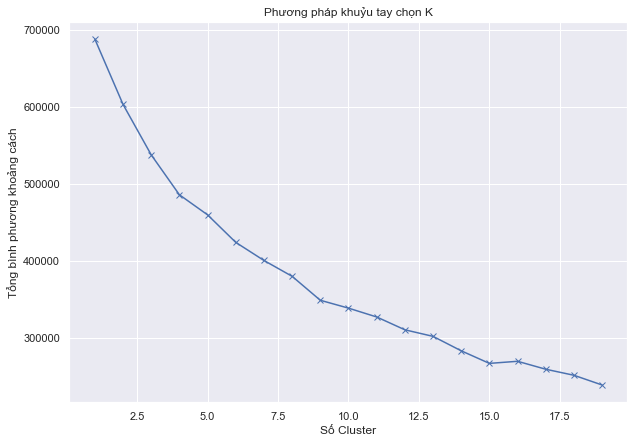

In [106]:
elbow()

In [107]:
# Số cluster 
k = 10

In [108]:
def center_array(D,row):
    x = []
    for d in range(D): x.append(df[d+1][row])
    return x

In [109]:
def create_center(k):
    r =  np.random.randint(0, len(df), size = k) # Chọn ngẫu nhiên điểm dữ liệu
    #r = [10,3,12,32]
    print(r)
    centroids = {
        i+1: center_array(d,r[i]) # đưa vào tập center
        for i in range(k)
    }
    #print(centroids)
    return centroids

In [110]:
centroids = create_center(k)
centroids

[41 80 50 55 10 84 93 32 89 60]


{1: [97, 85, 86, 59, 7, 27, 48, 41],
 2: [47, 9, 19, 12, 24, 24, 67, 50],
 3: [55, 90, 0, 39, 28, 57, 50, 14],
 4: [12, 83, 85, 71, 90, 2, 95, 85],
 5: [13, 79, 84, 78, 46, 24, 15, 38],
 6: [21, 28, 30, 4, 66, 11, 87, 8],
 7: [50, 38, 3, 63, 78, 10, 87, 64],
 8: [13, 25, 63, 6, 84, 22, 75, 54],
 9: [13, 60, 57, 86, 62, 33, 73, 29],
 10: [27, 63, 84, 5, 6, 21, 91, 14]}

### Lí thuyết
**Theo tiên đề Eculic về khoảng cách giữa 2 điểm trong không gian đa chiều**
- Công thức tính khoảng cách 2 giữa 2 điểm $A(p_{1}, p_{2},...p_{n}), B(q_{1}, q_{2},...q{n})$ 
    - distance_AB = $\sqrt{(p_{1} - q_{1})^2 + (p_{2} - q_{2})^2 + ... + (p_{n} - q_{n})^2}$ 

In [111]:
def distance_center(cluter):
    distance = 0
    for i in range(d-1):
        distance = distance + (df[i+1] - centroids[cluter][i])**2
    return np.sqrt(distance)

In [112]:
# Hàm tính khoảng cách từ mỗi điểm dữ liệu đến mỗi center
def assigment(df, centroids):
    for i in centroids.keys():
        # Theo Eculic
        df['distance_from_{}'.format(i)] = (
            distance_center(i)  
        )     
    centroids_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroids_distance_cols].idxmin(axis=1) # Tìm cluter center gần nhất 
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_'))) # Bỏ đi các ký tự distance_from_
    return df   
df = assigment(df, centroids)
df

,1,2,3,4,5,6,7,8,distance_from_1,distance_from_2,distance_from_3,distance_from_4,distance_from_5,distance_from_6,distance_from_7,distance_from_8,distance_from_9,distance_from_10,closest
0,90,44,22,68,40,0,39,80,88.351570,88.515535,90.443352,131.236428,110.842230,110.806137,76.615925,124.623433,102.288807,128.234161,7
1,68,73,26,43,33,12,96,3,89.699498,81.320354,72.910905,104.168133,120.515559,83.318665,67.734777,105.872565,88.402489,86.162637,7
2,38,30,77,85,56,54,35,70,102.771591,110.285992,113.806854,105.853673,67.260687,117.115328,106.263823,102.445107,62.024189,119.933315,9
3,26,81,16,29,64,22,71,6,121.078487,86.850446,65.115282,91.525953,103.256961,63.529521,65.924199,80.367904,75.292762,96.384646,6
4,72,71,14,52,75,0,99,62,118.355397,101.464279,94.201911,96.907172,132.642376,85.767127,45.475268,106.089585,92.417531,120.266371,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,47,34,73,53,85,67,36,73,114.603665,108.411254,110.770032,108.742816,87.965902,105.166535,104.517941,84.219950,78.936683,122.670290,9
96,45,76,5,16,92,96,56,8,152.463110,120.971071,80.641181,144.651305,141.770942,111.852582,110.611934,113.973681,118.498945,145.261833,3
97,0,28,82,46,3,57,92,22,125.279687,99.247166,126.613585,120.024997,112.538882,104.971425,130.341858,101.064336,88.521184,70.320694,10
98,97,17,52,53,39,69,5,27,102.239914,106.901824,110.828697,167.880910,121.338370,139.996429,129.911508,136.323146,128.327706,145.371937,1


In [113]:
def new_center(cluter,d):
    for i in range(d):
        # Cập nhập cluster mới bằng câchs tính mean toàn bộ điểm dữ liệu của Cluster đó
        centroids[cluter][i] = np.mean(df[df['closest'] == cluter][i+1]) 
        #print(np.mean(df[df['closest'] == cluter][i+1]))
    return

In [114]:
old_centroids = copy.deepcopy(centroids)

# Update tọa độ mỗi center sau mỗi vòng lặp 
def update(k):
    for cluter in centroids.keys():
        new_center(cluter,d)
    return k
centroids = update(centroids)
centroids

{1: [82.0,
  48.8,
  71.6,
  68.0,
  27.133333333333333,
  54.46666666666667,
  45.6,
  45.06666666666667],
 2: [68.23076923076923,
  22.0,
  34.84615384615385,
  21.923076923076923,
  30.307692307692307,
  48.30769230769231,
  57.07692307692308,
  42.76923076923077],
 3: [55.92857142857143,
  73.5,
  21.5,
  42.357142857142854,
  52.785714285714285,
  69.5,
  41.642857142857146,
  26.714285714285715],
 4: [12.0, 83.0, 85.0, 71.0, 90.0, 2.0, 95.0, 85.0],
 5: [25.8, 62.6, 76.6, 55.0, 56.4, 36.0, 12.0, 17.6],
 6: [30.0, 39.0, 31.0, 14.0, 69.6, 14.2, 75.0, 27.2],
 7: [65.38461538461539,
  36.30769230769231,
  27.307692307692307,
  63.84615384615385,
  60.07692307692308,
  28.692307692307693,
  80.23076923076923,
  53.46153846153846],
 8: [31.25, 25.75, 55.0, 12.5, 86.25, 49.5, 31.5, 59.75],
 9: [32.4, 54.88, 54.96, 79.72, 57.0, 59.6, 60.68, 54.32],
 10: [25.6, 50.4, 76.4, 20.2, 6.4, 52.0, 82.8, 18.4]}

In [115]:
n = 0
while old_centroids != centroids:
    n = n+1
    df = assigment(df, centroids) # tính khoảng cách và label các điểm dữ liệu
    old_centroids = copy.deepcopy(centroids) # copy các điểm center ra 1 tập mới
    centroids = update(centroids) # cập nhập các điểm center
n

4

In [116]:
centroids

{1: [81.6923076923077,
  50.30769230769231,
  74.76923076923077,
  73.3076923076923,
  34.61538461538461,
  59.07692307692308,
  38.84615384615385,
  47.61538461538461],
 2: [75.81818181818181,
  24.181818181818183,
  47.0,
  17.90909090909091,
  24.363636363636363,
  52.09090909090909,
  50.27272727272727,
  43.27272727272727],
 3: [62.36363636363637,
  73.72727272727273,
  22.181818181818183,
  40.45454545454545,
  50.0,
  73.18181818181819,
  42.90909090909091,
  25.454545454545453],
 4: [8.666666666666666,
  62.333333333333336,
  66.0,
  78.0,
  77.33333333333333,
  18.333333333333332,
  84.33333333333333,
  54.333333333333336],
 5: [13.6, 73.8, 54.6, 42.6, 60.2, 25.8, 11.4, 26.4],
 6: [35.666666666666664,
  42.77777777777778,
  27.77777777777778,
  15.11111111111111,
  65.55555555555556,
  17.11111111111111,
  74.88888888888889,
  32.666666666666664],
 7: [63.833333333333336,
  37.27777777777778,
  30.055555555555557,
  75.5,
  49.27777777777778,
  25.61111111111111,
  84.33333333

In [117]:
df

,1,2,3,4,5,6,7,8,distance_from_1,distance_from_2,distance_from_3,distance_from_4,distance_from_5,distance_from_6,distance_from_7,distance_from_8,distance_from_9,distance_from_10,closest
0,90,44,22,68,40,0,39,80,80.253776,82.540999,88.753163,113.014257,101.332917,89.543906,60.399851,108.883539,102.448197,121.114424,7
1,68,73,26,43,33,12,96,3,97.390053,85.368283,83.091605,92.740977,108.929151,65.356288,54.336685,120.096316,97.982428,95.051058,7
2,38,30,77,85,56,54,35,70,54.414854,90.016757,89.227169,78.973976,78.633072,102.563260,79.367834,69.122174,53.970954,74.219145,9
3,26,81,16,29,64,22,71,6,112.839127,98.490046,71.758663,76.934315,73.902368,43.902670,78.168819,95.059850,86.075651,98.574469,6
4,72,71,14,52,75,0,99,62,115.795141,110.043455,97.094314,89.570580,117.104910,68.048186,59.553223,124.497490,107.234190,122.223081,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,47,34,73,53,85,67,36,73,67.041143,83.288754,76.584097,87.804075,77.871433,89.807820,89.273785,37.840124,65.045091,82.535065,8
96,45,76,5,16,92,96,56,8,122.918263,109.261231,60.464387,126.972000,109.940711,94.815611,116.639177,83.039900,96.792494,119.434470,3
97,0,28,82,46,3,57,92,22,108.620614,99.993719,120.291073,98.047041,117.416183,105.743925,104.474493,114.836297,101.427591,35.685872,10
98,97,17,52,53,39,69,5,27,59.479597,65.623016,83.903280,144.945584,112.487155,121.369958,103.831743,77.902985,103.661517,113.110238,1


In [118]:
result()

{'Cluster1': 750.162913751939, 'Cluster2': 616.8917967404988, 'Cluster3': 635.2008104557542, 'Cluster4': 87.11921147486203, 'Cluster5': 242.77356778946603, 'Cluster6': 398.2522818230757, 'Cluster7': 1021.9854101611827, 'Cluster8': 372.71203239099157, 'Cluster9': 688.9284695095429, 'Cluster10': 467.74145673552687}
Cost_function for all data: 5281.76795083284
7     18
9     13
1     13
3     11
2     11
6      9
10     9
8      8
5      5
4      3
Name: closest, dtype: int64
